In [3]:
import os
import numpy as np
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import cv2
from tqdm import tqdm

try:
    from google.colab import drive
    drive.mount("/content/drive")
    colab = True
except:
    colab = False

In [4]:
if(colab):
    images_path = '/content/drive/MyDrive/MADS/images'
    masks_path = '/content/drive/MyDrive/MADS/masks'
    collages_path = '/content/drive/MyDrive/MADS/collages'
else:
    images_path = 'segmentation_full_body_mads_dataset_1192_img/segmentation_full_body_mads_dataset_1192_img/images'
    masks_path = 'segmentation_full_body_mads_dataset_1192_img/segmentation_full_body_mads_dataset_1192_img/masks'
    collages_path = 'segmentation_full_body_mads_dataset_1192_img/segmentation_full_body_mads_dataset_1192_img/collages'

In [5]:
if(not os.path.isdir(images_path)):
    print("Ensure Image Path Exists")
if(not os.path.isdir(masks_path)):
    print("Ensure Mask Path Exists")
if(not os.path.isdir(collages_path)):
    print("Ensure Collages Path Exists")


In [ ]:
mask = cv2.imread(masks_path + '/' + mask_name)

In [6]:
image_names = [f for f in listdir(images_path) if isfile(join(images_path, f))]
mask_names =  [f for f in listdir(masks_path) if isfile(join(masks_path, f))]

In [7]:
if(not image_names == mask_names):
    print("Ensure there is no curroption is the data")

In [120]:
mask = cv2.imread(masks_path + '/' + 'HipHop_HipHop1_C1_00675.png')

In [121]:
max_x = 0
min_x = mask.shape[0]
max_y = 0
min_y = mask.shape[1]
for row in range(len(mask)):
        for column in range(mask.shape[1]):
                for channel in range(3):
                     if(mask[row][column][channel]):
                        if(min_y > row):
                            min_y = row
                        if(max_y < row):
                            max_y = row
                        if(min_x > column):
                            min_x = column
                        if(max_x < column):
                            max_x = column
                 

In [122]:
len(mask[150])

512

In [123]:
print(max_x, min_x, max_y, min_y)

394 279 336 128


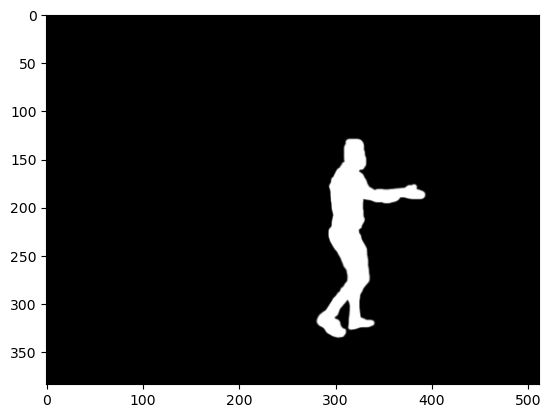

In [124]:
plt.imshow(mask)

In [125]:
color = (255, 0, 0) 
thickness = 1
crop_box = cv2.rectangle(mask, (min_x, min_y), (max_x, max_y), color, thickness) 

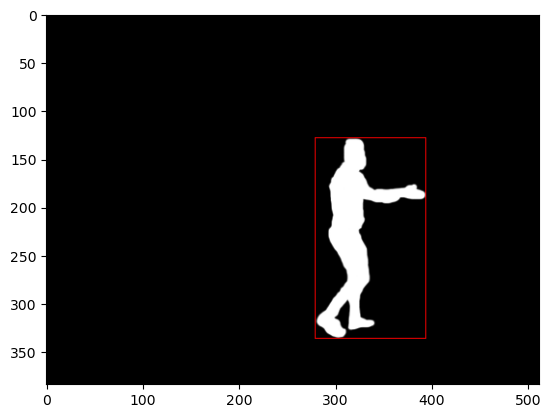

In [127]:
plt.imshow(crop_box)

In [128]:
cv2.imshow("AAA", mask) 

In [129]:
mask.shape[1]

512

In [130]:
x_border_max = mask.shape[1]
y_border_max = mask.shape[0]

In [ ]:
#Searching for global_crops this make take a bit. It can be optimized to not run in O(N^3) But it only needs to be ran once. 
global_max_x = 0
global_min_x = x_border_max
global_max_y = 0
global_min_y = y_border_max

for mask_name in tqdm(mask_names):
    mask = cv2.imread(masks_path + '/' + mask_name)
    for row in range(len(mask)):
            for column in range(mask.shape[1]):
                    for channel in range(3):
                         if(mask[row][column][channel]):
                            if(global_min_y > row):
                                global_min_y = row
                                global_min_y_image = mask_name
                            if(global_max_y < row):
                                global_max_y = row
                                global_max_y_image = mask_name
                            if(global_min_x > column):
                                global_min_x = column
                                global_min_x_image = mask_name
                            if(global_max_x < column):
                                global_max_x = column
                                global_max_x_image = mask_name
    
    

 30%|███       | 362/1192 [01:37<04:47,  2.89it/s]

In [63]:
print("The Crop Dimesions are ({0},{1}),({2},{3})".format(global_min_x, global_min_y, global_min_x, global_max_y))

The Crop Dimesions are (0,0),(0,383)


In [66]:
global_max_x_image

'HipHop_HipHop1_C1_00675.png'

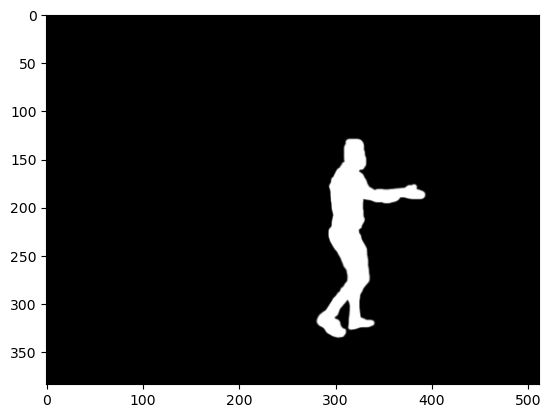

In [76]:
plt.imshow(cv2.imread(masks_path + "/" + global_max_x_image))

In [78]:
k = cv2.imread(masks_path + "/" + global_max_x_image)